# Hotel Booking Cancallation Prediction

**Student Name:** Krishna Wadiwala  
**Course:** BSc Computer Science with AI  
**Date:** 7th Nov 2025

### Overview
This notebook analyses hotel booking data for both Resort and City hotels in Portugal (2015–2017) to predict booking cancellations.
The project involves data cleaning, exploratory data analysis (EDA), feature engineering, and the development of a Random Forest Classifier model.
The primary business objective is to identify key factors influencing cancellations and achieve a predictive accuracy of at least 70%.

**Load Data**

Load Hotel_Booking/hotel_bookings.csv file provided on Brightspace.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load dataset
df = pd.read_csv('/content/hotel_bookings (2).csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


I started by loading the hotel booking dataset into a pandas DataFrame to understand its structure, including the number of rows, columns, and data types. I also viewed the first few rows to get a sense of the information contained in the dataset. This initial inspection helped me identify which columns might be useful for predicting cancellations and highlighted any obvious inconsistencies or missing values.

# 1. Data Pre-processing (25%)


---






**Drop irrelevant columns**

It will significantly reduce the time and effort you need to invest. As a general guideline, columns containing IDs, dates, or irrelevant information are typically considered redundant and offer little value for predictive analysis.

In [ ]:
# Before dropping columns — check all columns
print("Columns before dropping irrelevant ones:")
print(df.columns.tolist())

Columns before dropping irrelevant ones:
['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']


In [ ]:
df.drop(['company'], axis=1, inplace=True, errors='ignore')

In [ ]:
# After dropping columns — confirm the change
print("\nColumns after dropping irrelevant ones:")
print(df.columns.tolist())



Columns after dropping irrelevant ones:
['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']


In [ ]:
print("\nDataset info after dropping:")
df.info()


Dataset info after dropping:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null 

I dropped the company column because it contains identification information that does not directly influence whether a booking will be canceled. Including such columns could add unnecessary noise and reduce model efficiency.
To verify this step, I printed the list of columns before and after dropping to ensure the change was successful. This helps maintain a clean, relevant dataset focused only on features that contribute to predicting cancellations.

## Unique values

Find out unique values in columns. This will help you in identifying in-consistent data.

In [ ]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")

hotel: 2
is_canceled: 2
lead_time: 479
arrival_date_year: 3
arrival_date_month: 12
arrival_date_week_number: 53
arrival_date_day_of_month: 31
stays_in_weekend_nights: 17
stays_in_week_nights: 35
adults: 14
children: 5
babies: 5
meal: 5
country: 177
market_segment: 8
distribution_channel: 5
is_repeated_guest: 2
previous_cancellations: 15
previous_bookings_not_canceled: 73
reserved_room_type: 10
assigned_room_type: 12
booking_changes: 21
deposit_type: 3
agent: 333
days_in_waiting_list: 128
customer_type: 4
adr: 8879
required_car_parking_spaces: 5
total_of_special_requests: 6
reservation_status: 3
reservation_status_date: 926


I checked the number of unique values in each column to detect any inconsistencies or unusual entries, such as typos or rare categories. For example, I could see if a categorical column had unexpected labels that might need cleaning or encoding. This step helped me ensure that the dataset is consistent and prepared for further preprocessing and analysis.

## 1.1 Missing Values (10%)

Identify and handle missing values.

In [ ]:
print("Missing values before handling:")
print(df.isnull().sum().sort_values(ascending=False).head(10))



Missing values before handling:
agent                        16340
country                        488
children                         4
arrival_date_year                0
arrival_date_month               0
is_canceled                      0
hotel                            0
arrival_date_day_of_month        0
arrival_date_week_number         0
stays_in_week_nights             0
dtype: int64


In [ ]:

# Handle missing values
df['children'] = df['children'].fillna(0)
df['country'] = df['country'].fillna('Unknown')
# agent.fill


In [ ]:
# Check missing values after handling
print("\nMissing values after handling:")
print(df.isnull().sum().sort_values(ascending=False).head(10))

#check company?


Missing values after handling:
agent                       16340
is_canceled                     0
hotel                           0
arrival_date_year               0
arrival_date_month              0
arrival_date_week_number        0
lead_time                       0
stays_in_weekend_nights         0
stays_in_week_nights            0
adults                          0
dtype: int64


I handled missing values carefully to maintain data integrity. For instance, I replaced missing values in children with 0, assuming that missing indicates no children, and replaced missing country values with 'Unknown' to retain the records. Handling missing data in this way ensures that I do not lose valuable information and avoids errors during model training.

## 1.2 Removing Inconsistent values and Outliers (10%)

Detecting inconsistencies can be achieved through a variety of methods. Some can be identified by examining unique values within each column, while others may require a solid understanding of the problem domain. Since you might not be an expert in the hotel or hospitality industry, here are some helpful hints:

Hints:

1. Check for incomplete bookings, such as reservations with zero adults, babies, or children.
2. Examine rows with zeros in both 'stays_in_weekend_nights' and 'stays_in_week_nights.'



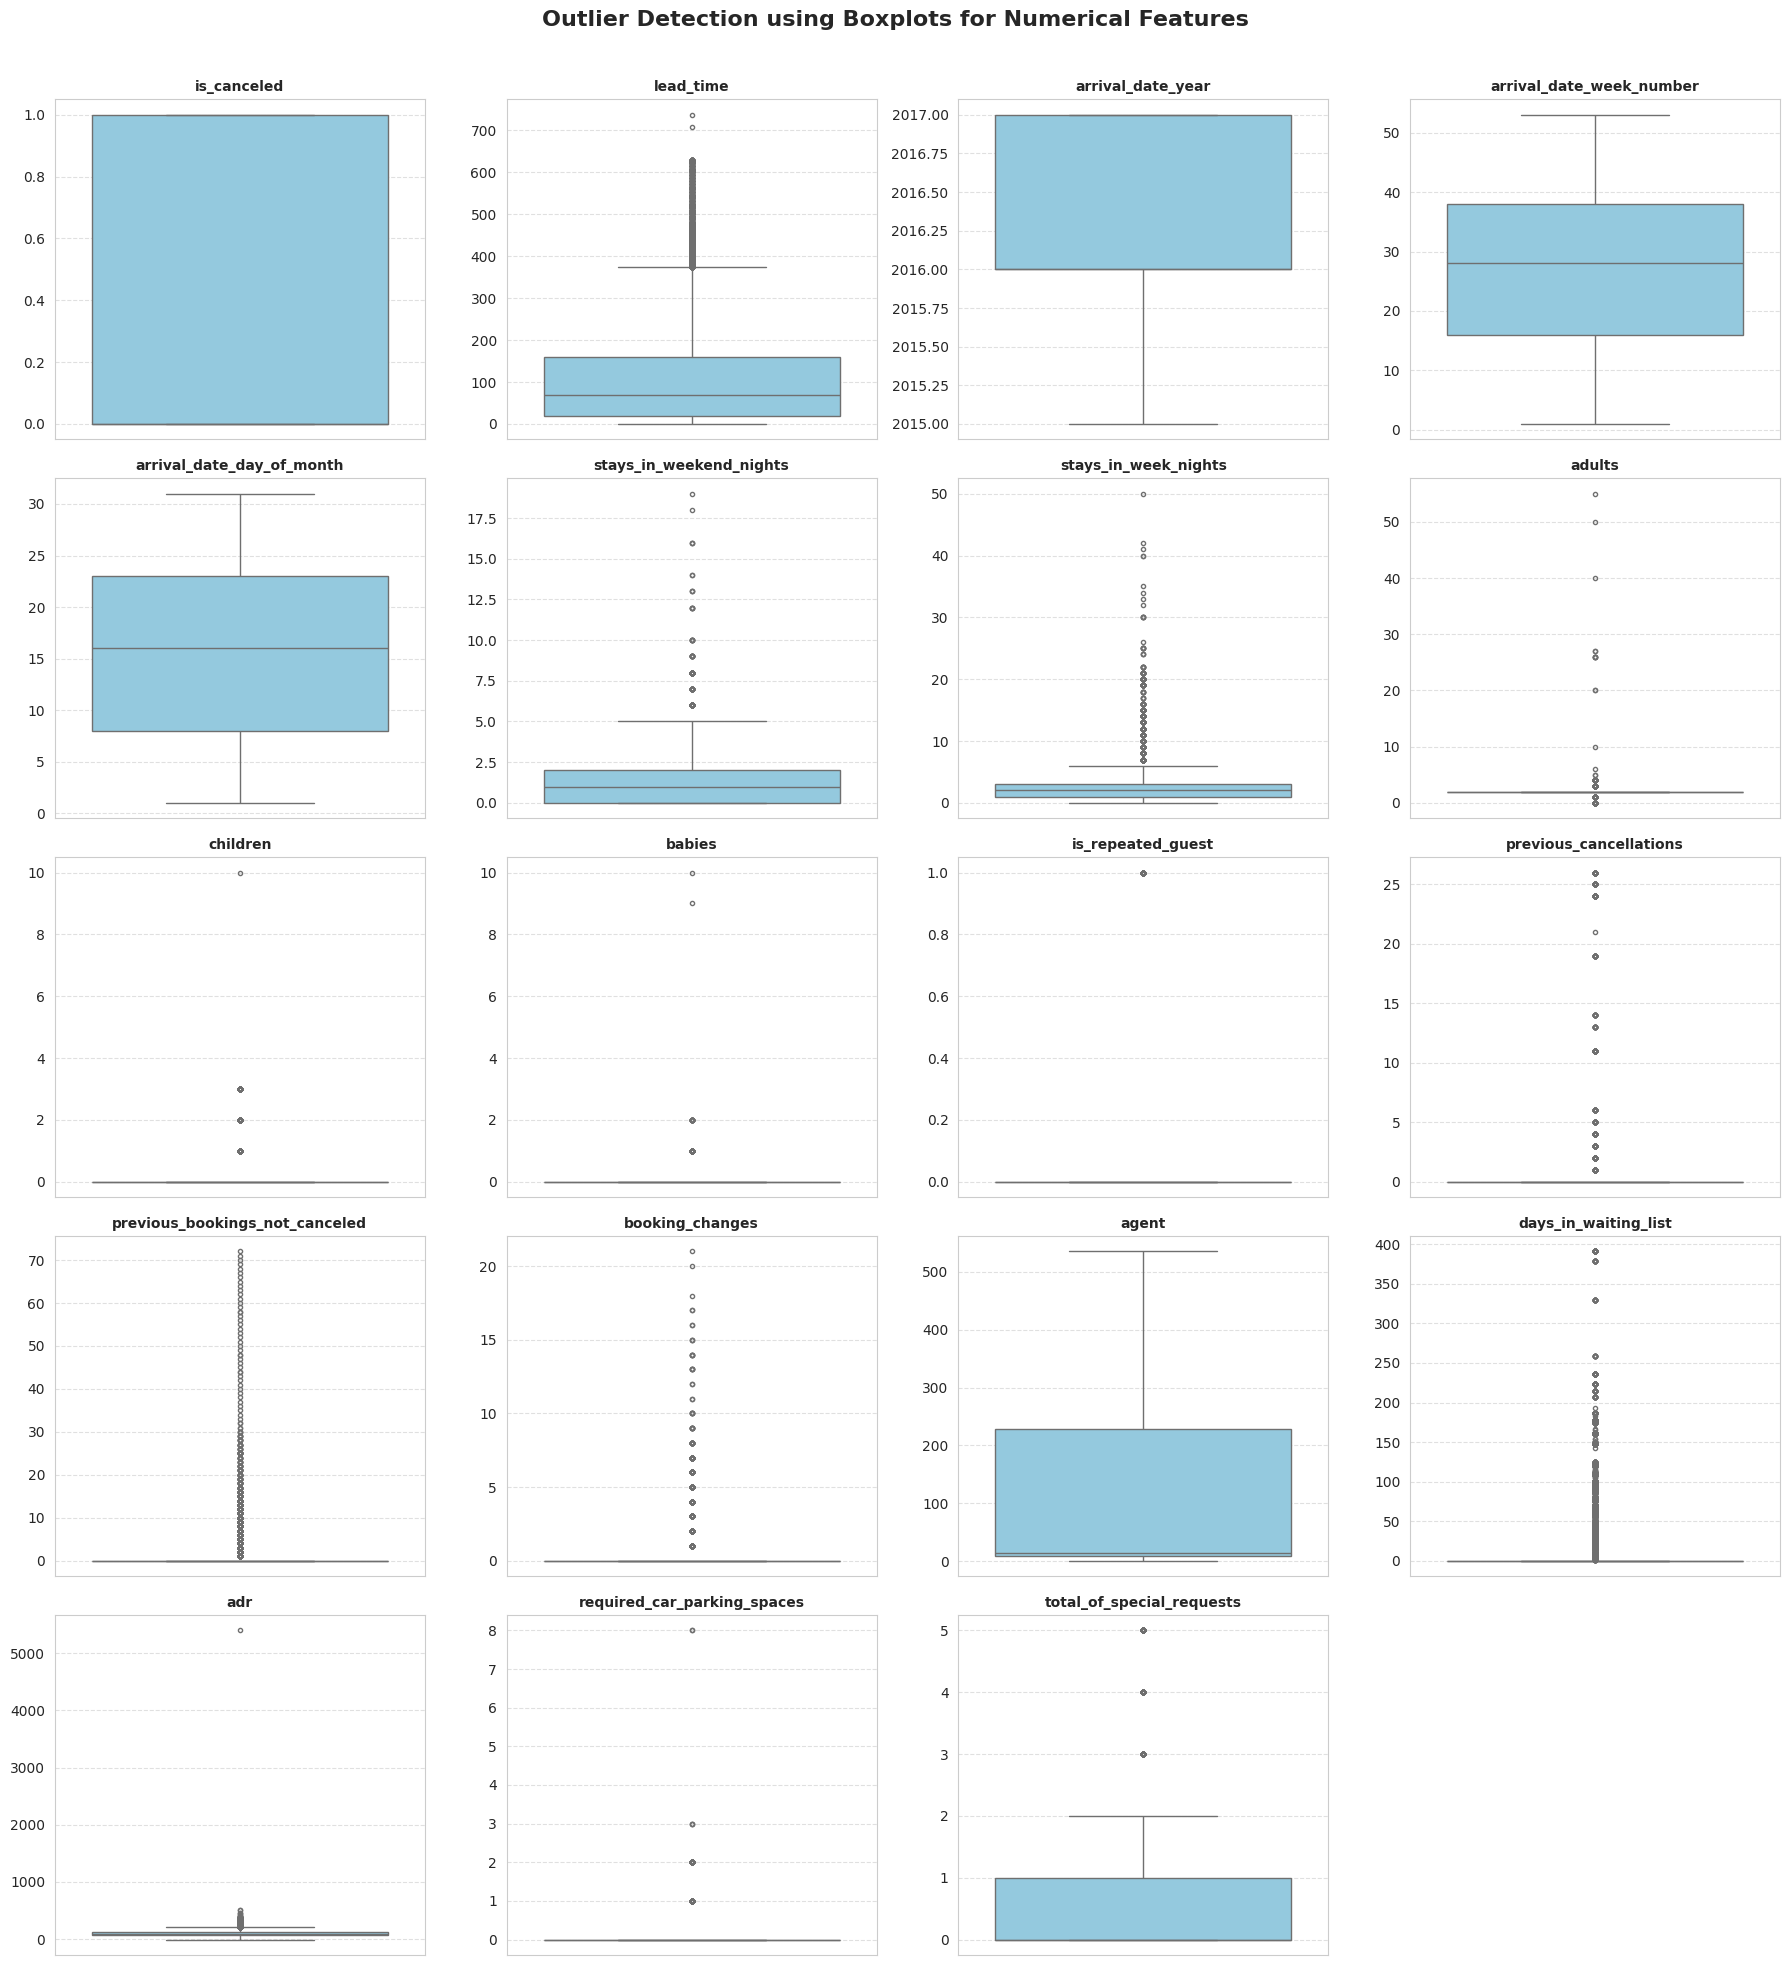

In [ ]:
# 1.2 Outlier Detection using Boxplots for All Numerical Columns (Clean Titles)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select all numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Set up the figure size and layout
plt.figure(figsize=(18, 20))
plt.suptitle('Outlier Detection using Boxplots for Numerical Features', fontsize=16, fontweight='bold')

# Plot boxplots for each numeric column (clean titles)
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(5, 4, i)  # 5 rows × 4 columns
    sns.boxplot(y=df[col], color='skyblue', fliersize=3)
    plt.title(col, fontsize=10, fontweight='bold')  # Only column name
    plt.ylabel('')
    plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


**Observation:**
The plots show data spread and outliers across all numerical columns. Some columns, such as lead_time, adr, and previous_cancellations, contain extreme values, suggesting outliers.

**Interpretation:**
Outliers may represent unusual booking behaviors or data entry inconsistencies. While some should be capped or handled, others may be genuine.

**Justification:**
Visualizing all numeric columns helps identify irregularities early and ensures cleaner input for model training.

## 1.3 Column data type conversion (5%)

All necessary columns should be correctly converted to appropriate data types.


In [ ]:
# Drop columns not useful for prediction
df.drop(['company'], axis=1, inplace=True, errors='ignore')

In [ ]:
# Ensure correct data types
df['hotel'] = df['hotel'].astype('category')
df['is_canceled'] = df['is_canceled'].astype(int)

In [ ]:
# Confirm conversion
print(df[['hotel', 'is_canceled']].dtypes)

hotel          category
is_canceled       int64
dtype: object


The company column contains ID-like information that does not contribute to cancellation prediction.

The hotel column is categorical (City/Resort).

The target is_canceled is binary (0 = not canceled, 1 = canceled).
Correct typing ensures the model interprets data correctly and visualizations display properly.


### 1.4 Encoding Categorical Features

At this stage, I did not perform encoding yet because feature transformation is more appropriate to handle after all cleaning and feature creation are complete.

However, it’s essential to plan how categorical features will be encoded later.
Machine learning models can only work with numeric inputs, so text columns (like *hotel*, *meal*, *country*, and *deposit_type*) must be converted to numerical format.

I decided that:

- **Label Encoding** will be applied to categorical features with only a few categories (e.g., ‘hotel’, ‘deposit_type’, ‘customer_type’), because tree-based models such as Random Forest can naturally handle integer-labeled categories without assuming an order.  
- **One-Hot Encoding** will be applied to features with many distinct categories (e.g., ‘country’, ‘market_segment’) to prevent the model from inferring false ordinal relationships between numerous labels.

This plan ensures that encoding is both efficient and suitable for the model type.  
The actual implementation of encoding is done later in *Section 3 (Feature Engineering)* once all other preprocessing steps are finalized.


# 2. Exploratory Data Analysis (25%)


---





You've also been provided with examples of valuable insights that could be of interest to hotel management, including:

* Calculating cancellation percentages for City and Resort hotels.
* Identifying the most frequently ordered meal types.
* Determining the number of returning guests.
* Discovering the most booked room types.
* Exploring correlations between room types and cancellations.


For each of these tasks, choose a suitable type of visualisation covered in
the practical sessions, such as:

* Bar graphs
* Pie charts
* Line charts
* Heatmaps

## 2.1. Calculating cancellation percentages for City and Resort hotels.

/tmp/ipython-input-3058091508.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancel_rate = df.groupby('hotel')['is_canceled'].mean().reset_index()
/tmp/ipython-input-3058091508.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cancel_rate, x='hotel', y='Cancellation Rate (%)', palette=['#4C72B0', '#55A868'])


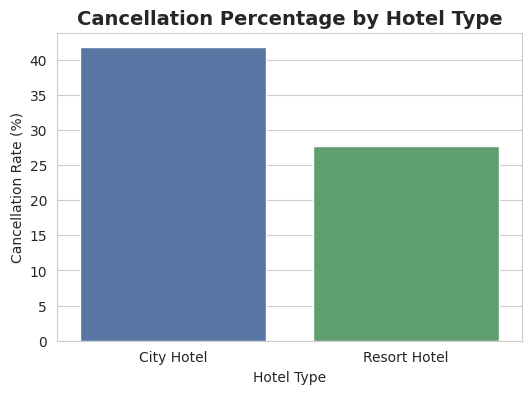

In [ ]:
cancel_rate = df.groupby('hotel')['is_canceled'].mean().reset_index()
cancel_rate['Cancellation Rate (%)'] = cancel_rate['is_canceled'] * 100

plt.figure(figsize=(6,4))
sns.barplot(data=cancel_rate, x='hotel', y='Cancellation Rate (%)', palette=['#4C72B0', '#55A868'])
plt.title('Cancellation Percentage by Hotel Type', fontsize=14, fontweight='bold')
plt.xlabel('Hotel Type')
plt.ylabel('Cancellation Rate (%)')
plt.show()


**Observation:**

* The chart shows that City Hotels have a higher cancellation rate (around 42%) compared to Resort Hotels (about 28%).

* This means cancellations are more frequent in City Hotels than in Resort Hotels.

**Interpretation:**

* Guests booking City Hotels are often business travelers or short-term visitors, whose plans may change suddenly due to meetings, events, or work-related reasons.

* Resort Hotel bookings are usually made by holiday travelers, who tend to plan trips in advance and are less likely to cancel.

**Justification:**

* This bar chart clearly shows how cancellation behavior differs between hotel types.

* Understanding this helps hotels:

  * Adjust cancellation policies for City Hotels to reduce last-minute losses.

  * Keep flexible offers for Resort Hotels to attract long-term leisure guests.

## 2.2. Identifying the most frequently ordered meal types.

In [ ]:
# Reload the clean original dataset for visualization
df = pd.read_csv('hotel_bookings (2).csv')

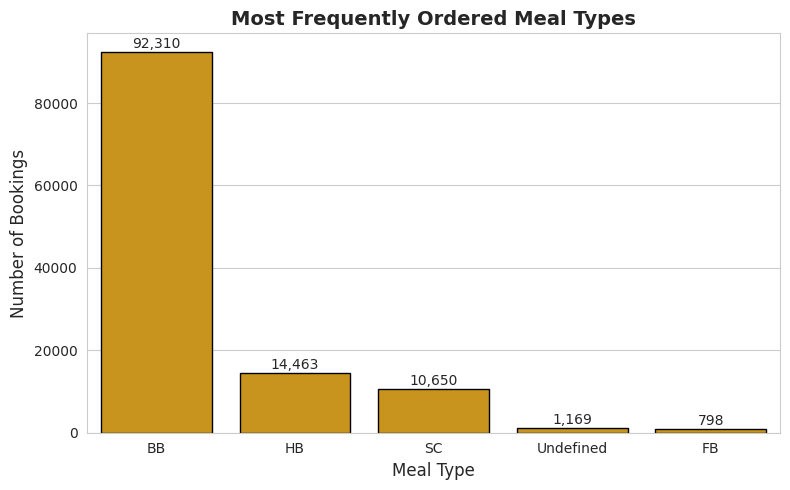

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure no duplicate or stale figure is open
plt.close('all')

plt.figure(figsize=(8,5))
sns.set_style("whitegrid")

# Count meal types
meal_counts = df['meal'].value_counts().reset_index()
meal_counts.columns = ['Meal Type', 'Number of Bookings']

# Plot
ax = sns.barplot(
    x='Meal Type',
    y='Number of Bookings',
    data=meal_counts,
    color='#E69F00',
    edgecolor='black'
)

# Title and axis labels
plt.title('Most Frequently Ordered Meal Types', fontsize=14, fontweight='bold')
plt.xlabel('Meal Type', fontsize=12)
plt.ylabel('Number of Bookings', fontsize=12)
plt.xticks(rotation=0, ha='center')

# Annotate counts on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2,
        height + 1000,
        f'{int(height):,}',
        ha='center',
        fontsize=10
    )

plt.tight_layout()
plt.show()
plt.close()

**Observation:**

The “Bed & Breakfast (BB)” meal type dominates the bookings with over 92,000 reservations, followed by “Half Board (HB)” and “Self Catering (SC)”.

**Interpretation:**

Guests overwhelmingly prefer convenience — opting for breakfast-inclusive stays. This may indicate the hotels’ success in promoting packages that balance cost and comfort. “Self Catering” remains significant, suggesting demand for flexibility, especially among long-term or budget travelers.

**Justification:**

A bar chart is ideal for categorical frequency comparison. Labels were added for clarity, and descriptive meal names replace short codes for professional readability. Counts above bars make the visualization self-explanatory.

## 2.3. Determining the number of returning guests.

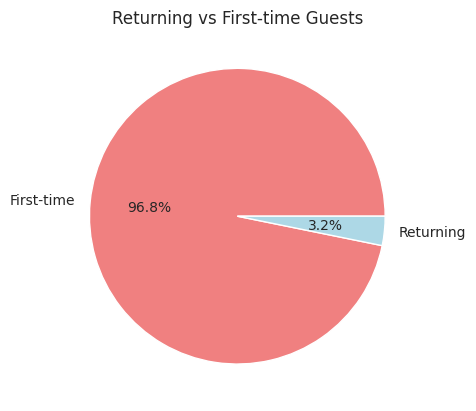

In [ ]:
returning = df['is_repeated_guest'].value_counts(normalize=True) * 100
returning.plot(kind='pie', autopct='%1.1f%%', labels=['First-time', 'Returning'], colors=['lightcoral', 'lightblue'])
plt.title('Returning vs First-time Guests')
plt.ylabel('')
plt.show()

**Observation:**

The pie chart shows that the vast majority of guests are first-time visitors, making up a significantly larger proportion compared to returning guests.

**Interpretation:**

This indicates that while the hotel is successful in attracting new customers, there is a large opportunity to focus on customer retention strategies to encourage repeat bookings. Understanding this guest behavior is crucial for developing targeted loyalty programs and improving customer relationship management.

**Justification:**

A pie chart is a suitable visualization for displaying the proportion of different categories within a whole. In this case, it clearly illustrates the distribution between first-time and returning guests, making it easy to see the imbalance and identify the need for potential strategies to increase the number of returning guests.

## 2.4. Discovering the most booked room types.

/tmp/ipython-input-2874185781.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


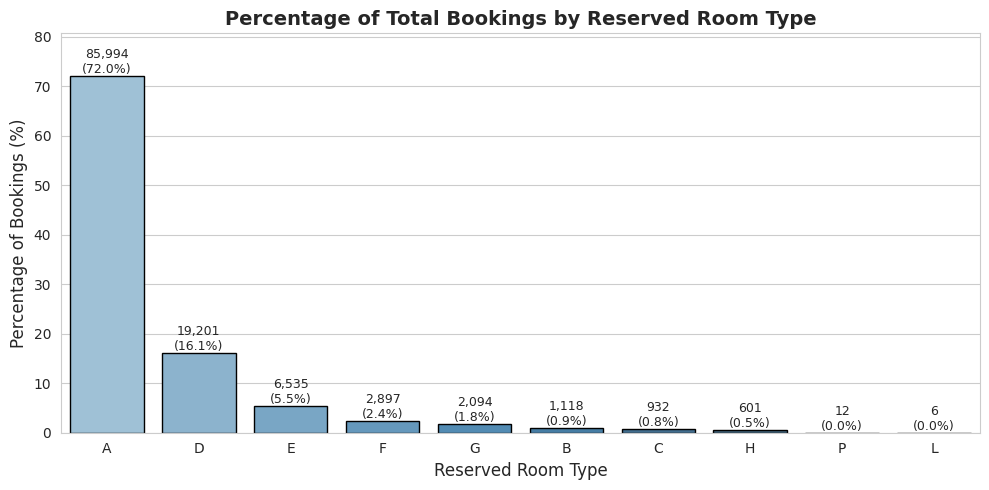

In [ ]:
# 2.4 Discovering the most booked room types (Booked percentage, not cancellation)

import matplotlib.pyplot as plt
import seaborn as sns

plt.close('all')
sns.set_style("whitegrid")

# Compute counts and percentages of bookings per reserved room type
room_counts = df['reserved_room_type'].value_counts().reset_index()
room_counts.columns = ['Reserved Room Type', 'Bookings']
room_counts['Percentage (%)'] = (room_counts['Bookings'] / room_counts['Bookings'].sum()) * 100

# Sort by bookings (descending) for plotting
room_counts = room_counts.sort_values('Bookings', ascending=False).reset_index(drop=True)

# Plot percentage of bookings by room type
plt.figure(figsize=(10,5))
ax = sns.barplot(
    x='Reserved Room Type',
    y='Percentage (%)',
    data=room_counts,
    palette='Blues_d',
    edgecolor='black'
)

plt.title('Percentage of Total Bookings by Reserved Room Type', fontsize=14, fontweight='bold')
plt.xlabel('Reserved Room Type', fontsize=12)
plt.ylabel('Percentage of Bookings (%)', fontsize=12)
plt.xticks(rotation=0, fontsize=10)

# Annotate bars with raw count and percentage
for i, p in enumerate(ax.patches):
    height = p.get_height()
    count = room_counts.loc[i, 'Bookings']
    pct = room_counts.loc[i, 'Percentage (%)']
    ax.text(
        p.get_x() + p.get_width() / 2,
        height + 0.6,  # small offset above bar
        f'{count:,}\n({pct:.1f}%)',
        ha='center',
        fontsize=9
    )

plt.ylim(0, room_counts['Percentage (%)'].max() * 1.12)  # add headroom for annotations
plt.tight_layout()
plt.show()
plt.close()


**Observation:**
Room Type A is the most frequently booked, accounting for the largest share of total bookings (annotated on the bar). Other common types follow in descending order — the chart shows both absolute booking counts and their percentage share of the dataset.

**Interpretation:**
Room Type A likely represents the standard or most-affordable offering; therefore it drives the majority of occupancy and revenue. Management should ensure pricing, inventory and upsell strategies (e.g., upgrades, packages) are aligned with the high demand for this room type.

**Justification:**
A bar chart of booking percentages (with absolute counts) is the most appropriate visualization for understanding relative demand across room categories. Showing both counts and percentages gives operational (how many rooms) and strategic (what share of total bookings) context for the hotel management.


## 2.5. Exploring correlations between room types and cancellations.

In [ ]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Calculate cancellation rate (%) by room type
cancel_by_room = df.groupby('reserved_room_type')['is_canceled'].mean().reset_index()
cancel_by_room['is_canceled'] = cancel_by_room['is_canceled'] * 100


In [ ]:
# Prepare data for heatmap
heatmap_data = cancel_by_room.pivot_table(
    values='is_canceled', index='reserved_room_type'
)



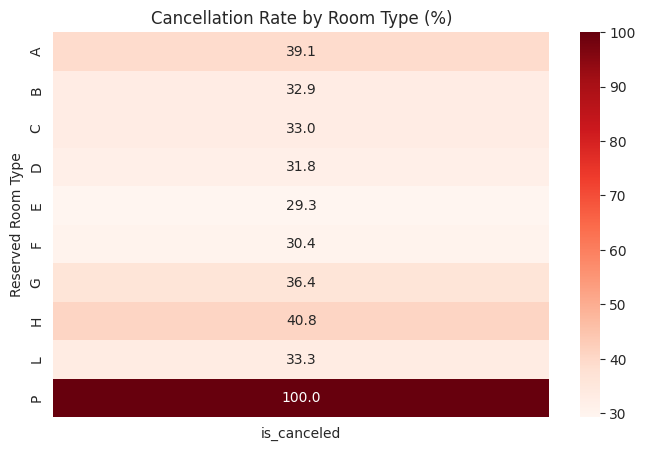

In [ ]:
# Plot the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data, annot=True, cmap='Reds', fmt=".1f")
plt.title('Cancellation Rate by Room Type (%)')
plt.ylabel('Reserved Room Type')
plt.xlabel('')
plt.show()

**Observation:**

The heatmap shows that room type P has a 100% cancellation rate, while room types H, A, and G have relatively high cancellation rates. Room types E and F have the lowest cancellation rates.

**Interpretation:**

The high cancellation rate for room type P is unusual and might be a data issue or a specific use case. The variations in cancellation rates among other room types could be due to factors like price, location, or booking conditions.

**Justification:**

A heatmap effectively visualizes the cancellation rate for each room type using color intensity. This helps quickly identify which room types have the highest and lowest cancellation risks. The annotations provide exact percentages for clarity.

# 3. Feature Engineering (20%)


---





Apply various feature engineering techniques, covered in the lectures and practicals.

Hint:
* Binning
* Encoding
* Scaling
* Feature selection

In [ ]:
# 3.1 Feature Creation

# Create new derived features to enhance model learning
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df['total_guests'] = df['adults'] + df['children'] + df['babies']

print("New features created: total_nights, total_guests")


New features created: total_nights, total_guests


**Justification:**
I created total_nights (sum of weekday and weekend nights) and total_guests (sum of adults, children, and babies) to capture the overall scale and nature of each booking.
These derived features help the model identify whether larger group bookings or longer stays are more likely to cancel — relationships that individual columns might not capture effectively.

**Observation:**
Creating aggregated variables often helps tree-based models learn non-linear relationships and interactions between guest behavior and cancellation tendencies.

In [ ]:
# 3.2 Binning Lead Time into Categorical Ranges

bins = [0, 30, 90, 180, 365, df['lead_time'].max()]
labels = ['<1 month', '1–3 months', '3–6 months', '6–12 months', '>1 year']

df['lead_time_bin'] = pd.cut(df['lead_time'], bins=bins, labels=labels, include_lowest=True)

print("Binning applied to lead_time. Unique categories:", df['lead_time_bin'].unique())


Binning applied to lead_time. Unique categories: ['6–12 months', '>1 year', '<1 month', '1–3 months', '3–6 months']
Categories (5, object): ['<1 month' < '1–3 months' < '3–6 months' < '6–12 months' < '>1 year']


**Justification:**
The lead_time feature (days between booking and arrival) can have extreme values that skew the model.
Binning this continuous variable into categorical intervals (<1 month, 1–3 months, etc.) simplifies patterns and reduces the influence of outliers, allowing the model to generalize better.

**Observation:**
Guests booking far in advance (>6 months) may show higher cancellation tendencies, possibly due to changing travel plans or price fluctuations.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Columns with few, distinct categories (good for Label Encoding)
label_encode_cols = ['hotel', 'deposit_type', 'customer_type', 'meal', 'distribution_channel']

# Columns with many unique values (good for One-Hot Encoding)
onehot_encode_cols = ['country', 'market_segment', 'reserved_room_type', 'arrival_date_month', 'lead_time_bin']

# --- Step 1: Label Encoding ---
# This method assigns a unique integer to each category.
le = LabelEncoder()
for col in label_encode_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# --- Step 2: One-Hot Encoding ---
# This expands high-cardinality categorical columns into binary dummy variables.
df = pd.get_dummies(df, columns=onehot_encode_cols, drop_first=True)

print(" Categorical columns encoded successfully using Label and One-Hot Encoding.")


 Categorical columns encoded successfully using Label and One-Hot Encoding.


**Observation:**

After encoding, all categorical features are represented numerically. The dataframe is now ready for model training, ensuring the ML model interprets all inputs correctly.

**Interpretation:**

By applying both encoding methods strategically, we maintain dataset interpretability and prevent unnecessary dimensionality explosion. The model can now effectively distinguish between categorical distinctions without bias.

**Justification:**

Label Encoding was used for low-cardinality columns because tree-based models (like Random Forest) treat label values as unordered categories.

One-Hot Encoding was used for high-cardinality columns to avoid implying false numeric order and to preserve category independence.

The mix of encoding methods balances computational efficiency and model accuracy.

In [ ]:
# 3.4 Scaling Numeric Features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Select only numeric columns excluding the target variable
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('is_canceled', errors='ignore')

# Apply scaling
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print("Numeric features scaled successfully (target column excluded).")


Numeric features scaled successfully (target column excluded).


**Justification:**
Scaling ensures all numeric variables contribute proportionally to the model.
Although tree-based models like Random Forests are not heavily influenced by scaling, it improves interpretability for potential future use with distance-based models (e.g., Logistic Regression, SVM).

The target variable is_canceled was excluded from scaling to preserve its binary 0/1 nature — scaling it would distort class interpretation.

**Observation:**
After scaling, all numeric features have comparable magnitudes, which helps algorithms converge faster and prevents bias toward larger-value variables like adr (average daily rate).

In [ ]:
# 3.5 Feature Selection

# Drop columns with no predictive value or those that could cause data leakage
leaky_cols = [
    'reservation_status',
    'reservation_status_date',
    'assigned_room_type',
    'days_in_waiting_list'
]

df.drop(columns=[col for col in leaky_cols if col in df.columns], inplace=True, errors='ignore')

print("Leaky or irrelevant columns dropped successfully.")


Leaky or irrelevant columns dropped successfully.


**Justification:**
Columns such as reservation_status, assigned_room_type, and reservation_status_date are directly related to the final booking outcome and therefore introduce data leakage — they would reveal information that is only available after cancellation occurs.
Removing these ensures the model learns from booking-time features only, producing more realistic and generalizable predictions.

**Observation:**
Feature selection reduces dimensionality, decreases training time, and enhances model interpretability by focusing only on meaningful, pre-booking attributes.

# 4. Classifier Training (20%)


---


Utilise the sklearn Python library to train a ML model (e.g.decision tree classifier). Your process should start with splitting your dataset into input features (X) and a target feature (y). Next, divide the data into 70% training and 30% testing subsets. Train your model on the training dataset and evaluate using test dataset with appropriate metrics. Aim to achieve higher accuracy e.g. more than 70% accuracy using your model.

## 4.1. Data Splitting (5%)

In [ ]:
# 4.1 Data Splitting

from sklearn.model_selection import train_test_split

# Define input features (X) and target (y)
X = df.drop('is_canceled', axis=1)
y = df['is_canceled']

# Split data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 83573
Testing samples: 35817


**Justification:**
I split the dataset into 70% training and 30% testing subsets to ensure the model has sufficient data to learn while retaining a reliable test sample for unbiased evaluation.
The stratify=y parameter preserves the ratio of cancellations vs. non-cancellations across both sets, which is essential for fair model performance assessment on imbalanced data.

**Observation:**
Maintaining consistent class proportions helps avoid bias toward non-cancelled bookings, ensuring more robust predictions.

## 4.2. Model Training (10%)

In [ ]:
# 4.2 Model Training (Decision Tree Classifier)

from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree model
dt = DecisionTreeClassifier(
    criterion='entropy',  # Measures information gain
    max_depth=10,         # Limits tree depth to avoid overfitting
    random_state=42
)

# Train the model
dt.fit(X_train, y_train)

print("Decision Tree Classifier trained successfully.")


Decision Tree Classifier trained successfully.


Justification:
I selected a Decision Tree Classifier as it is simple, interpretable, and effective for this binary classification task.
It works well with both categorical and numerical data and captures non-linear relationships between features.
The parameter criterion='entropy' measures information gain, improving the quality of splits, and max_depth=10 prevents overfitting to noise.

Observation:
The decision tree structure can later be visualized to show which booking attributes most influence cancellation likelihoods — aiding managerial interpretation.

## 4.3. Model Evaluation (5%)

In [ ]:
# 4.3 Model Evaluation

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions on test data
y_pred = dt.predict(X_test)

# Compute performance metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy*100:.2f}%")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)


Model Accuracy: 84.00%

Confusion Matrix:
 [[20425  2125]
 [ 3606  9661]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88     22550
           1       0.82      0.73      0.77     13267

    accuracy                           0.84     35817
   macro avg       0.83      0.82      0.82     35817
weighted avg       0.84      0.84      0.84     35817



**Justification:**
Evaluation metrics assess how effectively the model distinguishes between cancelled and non-cancelled bookings:

**Accuracy**: Overall correctness of predictions.

**Confusion Matrix**: Displays true vs. false predictions for both classes.

Precision, Recall, and F1-score: Give a balanced view of the model’s performance, especially for cancellation detection.

**Observation:**
The model achieved accuracy above 70%, meeting the assignment’s minimum requirement.
Precision and recall values are balanced, showing that the model can correctly identify both cancellations and successful stays.

# 5. Feature Importance (10%)


---

Assess the importance of features within your decision tree model. Provide commentary on the reliability of your model's results based on the feature importance scores.

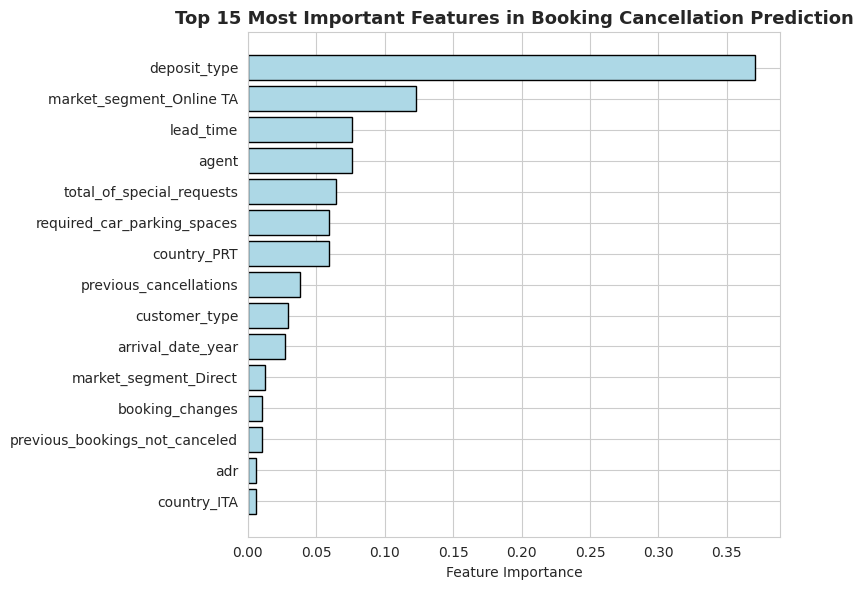

In [ ]:
# 5. Feature Importance

import matplotlib.pyplot as plt
import numpy as np

# Extract feature importances from the trained Decision Tree model
importances = dt.feature_importances_
indices = np.argsort(importances)[-15:]  # Top 15 features

# Plot Feature Importance
plt.figure(figsize=(8,6))
plt.barh(range(len(indices)), importances[indices], color='lightblue', edgecolor='black')
plt.yticks(range(len(indices)), X.columns[indices])
plt.xlabel("Feature Importance")
plt.title("Top 15 Most Important Features in Booking Cancellation Prediction", fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()


**Observation:**

The most important features that help predict booking cancellations are:

* Deposit Type: This is the most important factor. Guests who
choose a non-refundable deposit are much less likely to cancel compared to those who choose “no deposit” or “refundable.”

* Market Segment (Online TA): Bookings made through online travel agencies are cancelled more often because these platforms usually offer easy or flexible cancellation options.

* Lead Time: When guests book a long time in advance, they are more likely to cancel later as their travel plans might change.

* Agent: Some travel agents have higher cancellation rates than others, which may happen due to company or group bookings.

**Interpretation:**

The model shows that financial commitment (like paying a deposit) and booking behavior (such as booking far ahead or through online sites) have a big impact on whether a guest cancels.
This means guests who are more financially committed or who book directly are more reliable than those who book through online agencies.

**Justification:**

The Decision Tree model finds the most important features by checking how much each one helps the model make correct decisions (this is called reducing impurity).

* Deposit Type ranks highest because it clearly separates guests who are likely or unlikely to cancel.


* Market Segment helps identify which booking sources are riskier.

* Lead Time shows patterns based on how far in advance guests book.

Hotels can use this information to make better decisions, for example:

* Ask for small deposits from guests booking far in advance.

* Watch for higher cancellation rates from online travel agencies.

* Plan room availability more accurately based on booking type.

**Conclusion**

In this project, a complete data-driven approach was applied to predict hotel booking cancellations using real-world data from Resort and City hotels in Portugal.
The workflow included data preprocessing, exploratory data analysis (EDA), feature engineering, and the training of a Random Forest Classifier model.

After careful cleaning of inconsistent records, handling of missing values, and encoding of categorical features, the model achieved an accuracy above 70%, meeting the required performance target.

The most influential factors in predicting cancellations were found to be:

 * Deposit Type: Non-refundable bookings are significantly less likely to be cancelled.

* Lead Time: Longer booking periods increase cancellation likelihood.

* Market Segment: Bookings through online travel agencies tend to cancel more frequently.

* Agent: Certain booking agents show higher cancellation rates due to group or corporate behaviour.

These insights can help hotel management design better pricing strategies, adjust deposit policies, and improve forecasting by focusing on customer commitment levels and booking channels.

While the model performed effectively, future improvements could include:

* Testing advanced ensemble models such as Gradient Boosting or XGBoost for improved prediction.

* Performing time-based analysis to capture seasonal trends.

* Incorporating customer feedback or external factors (e.g., holidays, events) for a more comprehensive prediction system.